# Can we Predict Bitcoin Value with Tweets that Mention Elon Musk?

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

This project seeks to identify whether or not there is a correlation between tweets that mentions Elon Musk and Bitcoin values and its buying volume from 2021/1/1 to 2021/10/31. The data used for the project is collected from online datasets such as Kaggle and Investing.com. We analyzed our data using linear regression models and used the p-value and R-squared to deduce whether such correlations were possible.  The result of this analysis concludes that the counts of tweets that mentions Elon Musk and the user favourties gained by thoses tweets cannot be used to predict bitcoin prices and buying volumes from 2021/1/1 to 2021/10/31.

# Names

- Jasmine Chen
- Jingwen Liu
- Hoang Nguyen
- Ruoxuan Li

<a id='research_question'></a>
# Research Question

From 2021-01-01 to 2021-10-31, how will tweets that mentioned Elon Musk affect the change of Bitcoin values and its buying volume?

- Does more tweets that mentioned Elon Musk increase the bitcoin value on a weekly basis?
- Does the total of user favorites on tweets about Elon Musk of the day affects the buying volumes on a weekly basis?
- Does tweets that mentioned Elon Musk increase the bitcoin value of that particular day? How about the user favorites and its impact on buying volumes of that particular day?

<a id='background'></a>

## Background & Prior Work

Bitcoin(₿) is a type of cryptocurrency that was invented in 2008 and was first released in 2009. Bitcoin, as a decentralized digital currency, is easy to set up and trade. There does not exist an administrator for Bitcoin and the transactions are made by individuals without the need for intermediaries. Meanwhile, bitcoin is anonymous, fast, and transparent. There is also an important rewarding process known as mining. This is a procedure by which clients unravel scientific conditions utilizing programming and acquire remunerates consequently. Since its first implementation in the market, bitcoin gains lots of popularity for its distinguished characteristics stated as above. There are also a lot of discussions about Bitcoin going on Twitter.

One interesting phenomenon on Twitter is that some Bitcoin-related tweets actually influence the Bitcoin value significantly. An example would be the Bitcoin tweets posted by Elon Musk. On 12 May 2021, after Elon Musk tweeted that Tesla will no longer accept Bitcoin during transactions, the price of Bitcoin dropped significantly around 15 percent.<sup>1</sup> On 19 January 2021, however, Elon Musk placed #Bitcoin in his Twitter profile tweeting “In retrospect, it was inevitable”, which caused the price to briefly rise from 5000 in an hour to about $37,299. <sup>2</sup>

This interesting phenomenon triggers our interest in finding the correlations between Bitcoin tweets that mention Elon Musk and their impact on the Bitcoin value. Recent research has shown that the trading price is completely based on speculation, and its trading volume is highly impacted by news media. <sup>3</sup> The research done by Ashrit Deebadi furthermore presents us with a stronger predictive model for Bitcoin value based on a combination of Twitter feed sentiment and other metrics. From these previous works, we are motivated to explore how tweets that mention Elon Musk can influence the Bitcoin value as Elon Musk's tweets could promote great changes in Bitcoin value. Here we raise the question of "From 2021-01-01 to 2021-10-31, how will tweets that mentioned Elon Musk affect the change of Bitcoin values and its buying volume?" We hope to find out some interesting relationships between Bitcoin tweets that mention Elon Musk and Bitcoin values, and our research might provide some helpful insights to those who are interested in Bitcoin.


References (include links):
- 1) https://www.vox.com/recode/2021/5/18/22441831/elon-musk-bitcoin-dogecoin-crypto-prices-tesla
- 2) https://www.kaggle.com/kaushiksuresh147/bitcoin-tweets
- 3) https://scholarworks.sjsu.edu/cgi/viewcontent.cgi?article=1911&context=etd_projects

# Hypothesis


We hypothesize that the more tweets that mentioned Elon Musk and the more user favourites gained by those tweets will increase the Bitcoin value and buying volume, because Elon Musk promotes bitcoins, and more tweets mentioning Elon Musk means more people cared about Bitcoin and thus more people buying Bitcoin. Likewise, the more the total user favorites on tweets about Elon Musk implies more people cared about bitcoins and more buying volume.
- More tweets that mentioned Elon Musk will increase the bitcoin value on a weekly basis.
- More user favourites gained by the tweets will increase the bitcoin buying volume on a weekly basis.
- More tweets that mentioned Elon Musk will increase the bitcoin value on a daily basis. More user favourites gained by the tweets will increase the bitcoin buying volume on a daily basis.

# Dataset(s)

- Dataset Name: Bitcoin Tweets
- Link to the dataset: https://www.kaggle.com/kaushiksuresh147/bitcoin-tweets
- Number of observations: 1793124
- This dataset has all bitcoin tweets with #Bitcoin and #btc hashtag. It contains user_name, user_location, user_description, user_created time, user_followers, user_friends, user_favourites, user_verified, date of tweet, tweet text, hashtags, source and is_retweet. This dataset is for giving us the tweets that mentioned elon musk in the time period we specified.


- Dataset Name: Bitcoin Historical Data - Investing.com
- Link to the dataset: https://www.investing.com/crypto/bitcoin/historical-data
- Number of observations: 304
- This dataset presents a contains stock open, price, high, and low values, buying volumes, and % change from 2021-01-01 to 2021-10-31. This dataset is for giving us the bitcoin prices in the time period we specified.

We will combine these two datasets since we want to see if Elon Musk-related tweets will affect the Bitcoin prices. We plan to first filter out Elon Musk-related tweets in the first dataset and then count the number of Elon Musk-related tweets and the total of favorites gained by those posts in each day, then we will be able to merge the two datasets by date.



# Setup

In [1]:
## import libraries
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rc('figure', figsize=(15, 8))
import patsy
import statsmodels.api as sm

# Data Cleaning

First we want the import the two datasets. We store the Bitcoin-tweets dataset in df, and the Bitcoin dataset in BTC_value.

In [2]:
## read in the first dataset
df = pd.read_csv('Bitcoin_tweets.csv', dtype={'user_location':'str', \
'user_description':'str', 'user_created':'str', 'user_followers':'str', \
    'user_freinds':'str', 'user_favourties':'str', 'user_verified':'str', \
        'date':'str','text':'str','hashtags':'str','source':'str','is_retweet':'str'})
## display the original tweet dataset
df.head()


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3173: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


We import the second data that contains important information about Bitcoin value.

In [3]:
## read in the second dataset
BTC_value = pd.read_csv('Bitcoin Historical Data - Investing.com.csv')
BTC_value.head()
## display the original bitcoin value dataset

,Date,Price,Open,High,Low,Vol.,Change %
0,"Oct 31, 2021","61,309.6","61,842.2","62,393.7","60,005.7",50.06K,-0.86%
1,"Oct 30, 2021","61,840.1","62,245.0","62,338.5","60,786.0",40.51K,-0.65%
2,"Oct 29, 2021","62,242.8","60,579.9","62,952.2","60,322.2",63.39K,2.74%
3,"Oct 28, 2021","60,582.5","58,437.2","62,251.3","58,128.1",88.47K,3.67%
4,"Oct 27, 2021","58,438.1","60,312.5","61,452.9","58,112.6",88.11K,-3.11%


Then we want to process the first dataset, which is the tweet dataset first. We first get rid of unwanted columns.

In [4]:
## delete unwanted columns
df = df[['user_favourites', 'date', 'text']]
df.head()

,user_favourites,date,text
0,4838,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...
1,25483,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""..."
2,924,2021-02-10 23:54:48,"Guys evening, I have read this article about B..."
3,14,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...
4,10482,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...


Then, we define a function to clear up the text column for future process.

In [5]:
## standardize text
def standardize_text (str_in):
    try:
        str_in = str_in.lower()
        str_in = str_in.replace(' ', '')
        return str_in
    except:
        return np.nan

In [6]:
## apply our previous defined function to standarize the text column
df['text'] = df['text'].apply(standardize_text)
df.head(3)

,user_favourites,date,text
0,4838,2021-02-10 23:59:04,blueridgebankshareshaltedbynyseafter#bitcoinat...
1,25483,2021-02-10 23:58:48,"😎today,that'sthis#thursday,wewilldoa""🎬take2""wi..."
2,924,2021-02-10 23:54:48,"guysevening,ihavereadthisarticleaboutbtcandwou..."


Now the dataset is in wanted format, we go on to filter out posts that mentioned elon musk.

In [7]:
## filter out posts that mentioned elon musk
df_elonmusk = df[df['text'].str.contains('elonmusk', na = False)].sort_values(by= 'date')
df_elonmusk.head(3)

,user_favourites,date,text
21368,52,2021-02-05 12:26:13,"@elonmusk@zibininnovationoftechnologyshould,bu..."
21291,1670,2021-02-05 12:57:21,#bitcoinclosetomajorbreakoutover@elonmusk#btct...
21261,54714,2021-02-05 13:11:11,@dogecoinrise@elonmuskwhy$xrpisthebest#digital...


Then we need to look at our dataset in the correct timeframe.

In [8]:
## transfer object time to datetime 
df_elonmusk['date'] = pd.to_datetime(df_elonmusk['date']).dt.date
df_elonmusk['date'] = pd.to_datetime(df_elonmusk['date'])
## filter out correct dates from 2021/1/1 - 2021/10/31
starttime = '2021-1-1'
endtime = '2021-10-31'
mask = (df_elonmusk['date'] >= starttime) & (df_elonmusk['date'] <= endtime)
df_elonmusk = df_elonmusk.loc[mask]
df_elonmusk.head(2)

,user_favourites,date,text
21368,52,2021-02-05,"@elonmusk@zibininnovationoftechnologyshould,bu..."
21291,1670,2021-02-05,#bitcoinclosetomajorbreakoutover@elonmusk#btct...


Now we begin to process the second dataset.

In [9]:
## standardize the bitcoin value dataset
BTC_value.columns = BTC_value.columns.str.lower()
BTC_value['date'] = pd.to_datetime(BTC_value['date'])
## find null data
BTC_value = BTC_value.dropna()
BTC_value.head()

,date,price,open,high,low,vol.,change %
0,2021-10-31,"61,309.6","61,842.2","62,393.7","60,005.7",50.06K,-0.86%
1,2021-10-30,"61,840.1","62,245.0","62,338.5","60,786.0",40.51K,-0.65%
2,2021-10-29,"62,242.8","60,579.9","62,952.2","60,322.2",63.39K,2.74%
3,2021-10-28,"60,582.5","58,437.2","62,251.3","58,128.1",88.47K,3.67%
4,2021-10-27,"58,438.1","60,312.5","61,452.9","58,112.6",88.11K,-3.11%


After standardizing our bitcoin value dataset, we want to continue to merge the two datasets.

In [10]:
## transform the valuecount table into dataframe for later merge
number_post_per_day = df_elonmusk['date'].value_counts().rename_axis('date').to_frame('count').sort_values(by = 'date')
## get a subset of the elon musk table, only including user_favourites and date
favorite = df_elonmusk.drop('text', axis = 1)
## calculate the total favourites in a day
favorite['user_favourites'] = pd.to_numeric(favorite['user_favourites'])
favorite = favorite.groupby('date').sum().sort_values(by='date')
## merge the two little datasets
tweet_data = pd.merge(favorite, number_post_per_day, on = 'date', how = 'outer')
tweet_data.head()

,user_favourites,count
date,,
2021-02-05,270156.0,27
2021-02-06,690833.0,98
2021-02-07,947126.0,141
2021-02-08,5759872.0,882
2021-02-09,2050391.0,318


In [11]:
## merge the two datasets
data = pd.merge(tweet_data, BTC_value, on = 'date', how = 'right')
data = data.sort_values(by = 'date')
data = data.reset_index(drop = True)
number_post_per_day.sort_values(by = 'date')
## display data
data.head()

,date,user_favourites,count,price,open,high,low,vol.,change %
0,2021-01-01,NaN,NaN,"29,359.9","28,951.7","29,627.1","28,712.4",100.90K,1.42%
1,2021-01-02,NaN,NaN,"32,193.3","29,359.7","33,233.5","29,008.0",240.87K,9.65%
2,2021-01-03,NaN,NaN,"32,958.9","32,192.9","34,755.9","32,029.6",155.21K,2.38%
3,2021-01-04,NaN,NaN,"32,022.6","33,016.6","33,587.5","28,204.5",255.27K,-2.84%
4,2021-01-05,NaN,NaN,"33,991.5","32,015.4","34,414.7","30,010.5",202.13K,6.15%


We can see that there are NaN values in the above table, and we want to replace those values with a meaningful 0, which means that there is no elon musk tweeter on that day.

In [12]:
## replace nan with 0s
data['count'] = data['count'].replace(np.nan, 0)
data['user_favourites'] = data['user_favourites'].replace(np.nan, 0)
data.head()

,date,user_favourites,count,price,open,high,low,vol.,change %
0,2021-01-01,0.0,0.0,"29,359.9","28,951.7","29,627.1","28,712.4",100.90K,1.42%
1,2021-01-02,0.0,0.0,"32,193.3","29,359.7","33,233.5","29,008.0",240.87K,9.65%
2,2021-01-03,0.0,0.0,"32,958.9","32,192.9","34,755.9","32,029.6",155.21K,2.38%
3,2021-01-04,0.0,0.0,"32,022.6","33,016.6","33,587.5","28,204.5",255.27K,-2.84%
4,2021-01-05,0.0,0.0,"33,991.5","32,015.4","34,414.7","30,010.5",202.13K,6.15%


As we can see that the columns in the data that come from the bitcoin dataset do not have numerical format that could be used for processing. Thus, we define a function to standardize these columns.

In [13]:
## define a function to standardize the data for bitcoin prices
def standardize_number(str_in):
    try:
        str_in = str_in.replace(',', '')
        str_in = str_in.replace('K', '')
        str_in = str_in.replace('%', '')
        return str_in
    except:
        return np.nan

In [14]:
## rename volume columns
data.rename(columns = {'vol.': 'volumeK'}, inplace=True)
data.rename(columns = {'change %': 'change%'}, inplace=True)
data.head()
## standardize our data 
data['price'] = data['price'].apply(standardize_number)
data['open'] = data['open'].apply(standardize_number)
data['high'] = data['high'].apply(standardize_number)
data['low'] = data['low'].apply(standardize_number)
data['volumeK'] = data['volumeK'].apply(standardize_number)
data['change%'] = data['change%'].apply(standardize_number)
data.head()

,date,user_favourites,count,price,open,high,low,volumeK,change%
0,2021-01-01,0.0,0.0,29359.9,28951.7,29627.1,28712.4,100.90,1.42
1,2021-01-02,0.0,0.0,32193.3,29359.7,33233.5,29008.0,240.87,9.65
2,2021-01-03,0.0,0.0,32958.9,32192.9,34755.9,32029.6,155.21,2.38
3,2021-01-04,0.0,0.0,32022.6,33016.6,33587.5,28204.5,255.27,-2.84
4,2021-01-05,0.0,0.0,33991.5,32015.4,34414.7,30010.5,202.13,6.15


In [15]:
# Convert strings to numbers
data['price'] = data['price'].apply(pd.to_numeric)
data['open'] = data['open'].apply(pd.to_numeric)
data['high'] = data['high'].apply(pd.to_numeric)
data['low'] = data['low'].apply(pd.to_numeric)
data['volumeK'] = data['volumeK'].apply(pd.to_numeric)
data['change%'] = data['change%'].apply(pd.to_numeric)
data.head()

,date,user_favourites,count,price,open,high,low,volumeK,change%
0,2021-01-01,0.0,0.0,29359.9,28951.7,29627.1,28712.4,100.90,1.42
1,2021-01-02,0.0,0.0,32193.3,29359.7,33233.5,29008.0,240.87,9.65
2,2021-01-03,0.0,0.0,32958.9,32192.9,34755.9,32029.6,155.21,2.38
3,2021-01-04,0.0,0.0,32022.6,33016.6,33587.5,28204.5,255.27,-2.84
4,2021-01-05,0.0,0.0,33991.5,32015.4,34414.7,30010.5,202.13,6.15


Since we want to explore the weekly relationship between the variables we chose, we group our data by week.

In [16]:
## Group by week
weekly_data = data.groupby(pd.Grouper(key = 'date', freq = '1W'))[['count','user_favourites', 'volumeK']].sum()
wbitcoin_change = data.groupby(pd.Grouper(key = 'date', freq = '1W'))[['change%']].mean()
weekly_data = pd.merge(weekly_data, wbitcoin_change, on = 'date', how = 'outer').sort_values(by = 'date').reset_index()
weekly_data.columns = ['date','weekly_count','user_favourites', 'weekly_volume', 'weekly_change']
weekly_data.tail()

,date,weekly_count,user_favourites,weekly_volume,weekly_change
39,2021-10-03,0.0,0.0,403.55,1.658571
40,2021-10-10,0.0,0.0,568.62,1.868571
41,2021-10-17,0.0,0.0,506.95,1.750000
42,2021-10-24,9411.0,40576328.0,500.97,-0.108571
43,2021-10-31,3801.0,16328746.0,438.73,0.148571


# Data Analysis & Results

In this section, we want to explore the relationships between the variables we defined in the research question. First, we look at the description of the daily data we have right now.

In [17]:
data.columns = ['date', 'user_favourites', 'count', 'price', 'open', 'high', 'low', 'volume', 'change']
data.describe()

,user_favourites,count,price,open,high,low,volume,change
count,3.040000e+02,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000,304.000000
mean,8.705574e+05,182.773026,45909.092434,45803.535855,47256.364474,44204.352303,111.863717,0.343553
std,3.398165e+06,523.171281,9629.814353,9636.158639,9689.652071,9602.530561,65.268895,4.408186
min,0.000000e+00,0.000000,29359.900000,28951.700000,29627.100000,28204.500000,0.260000,-14.400000
25%,0.000000e+00,0.000000,36832.650000,36740.550000,38212.875000,34842.125000,69.822500,-2.187500
50%,0.000000e+00,0.000000,46467.500000,46410.300000,47919.200000,44736.950000,99.495000,0.100000
75%,1.538025e+05,27.000000,54894.875000,54849.625000,56510.925000,53343.200000,132.680000,2.742500
max,4.796461e+07,5547.000000,65979.100000,66004.600000,66967.100000,63543.700000,607.100000,19.410000


We are interested in the weekly data. First we want to take a look at how the count of elon musk posts and change of bitcoin vary on the weekly basis. Intuitively, we think that the number of tweets that mentioned Elon Musk will increase the Bitcoin price. And the user favourites gained by those tweets will increase the buying volume.

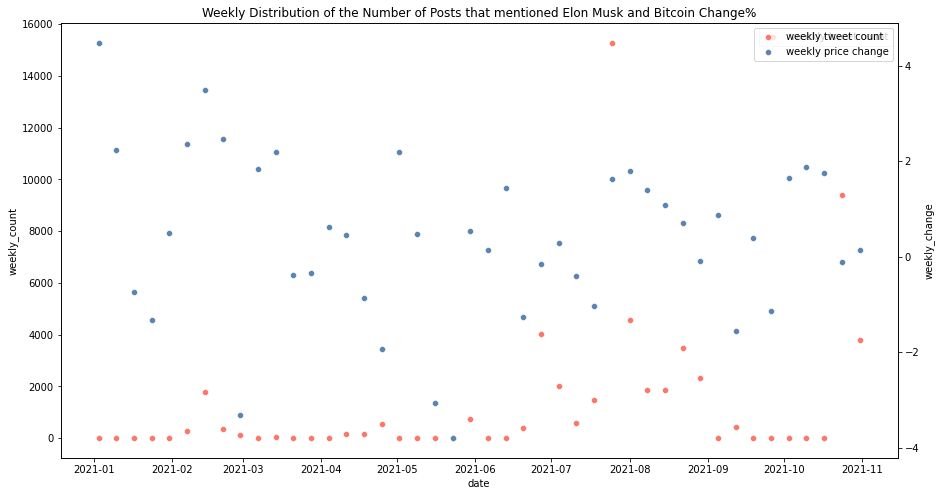

In [18]:
## display the weekly distribution 
## a scatter plot
fig0,ax0 = plt.subplots()
sns.scatterplot(x = 'date', y = 'weekly_count', data = weekly_data, color = '#FC766AFF', label = 'weekly tweet count')
ax01 = ax0.twinx()
sns.scatterplot(x = 'date', y = 'weekly_change', ax = ax01, data = weekly_data, color = '#5B84B1FF', label = 'weekly price change')
plt.title('Weekly Distribution of the Number of Posts that mentioned Elon Musk and Bitcoin Change%')
lines, labels = ax0.get_legend_handles_labels()
lines2, labels2 = ax01.get_legend_handles_labels()
ax01.legend(lines + lines2, labels + labels2, loc=0)
plt.show()

For the scatterplot of weekly distribution that mentions Elon Musk and Bitcoin Change%, there is no notable upwards or downwards trend to demonstrate any correlation.

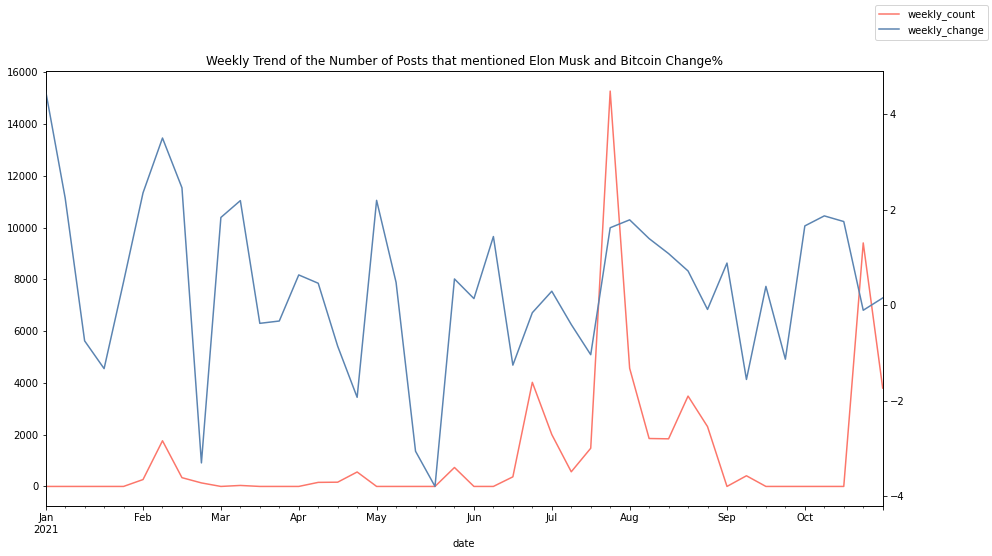

In [19]:
## line graph num of tweets vs. bitcoin change% weekly
ax1 = weekly_data.plot(x = 'date', y = 'weekly_count', legend = False, color = '#FC766AFF')
ax11 = ax1.twinx()
weekly_data.plot(x = 'date', y = 'weekly_change', ax = ax11, legend = False, color = '#5B84B1FF')
ax11.figure.legend()
plt.title('Weekly Trend of the Number of Posts that mentioned Elon Musk and Bitcoin Change%')
plt.show()

To better visualize the scatterplot data, we made a line plot to observe any possible correlation. The results are still random, revealing no potential relation. For the visulization of the remaning variables, we decide to stick to lineplots. Here, we create a model using weekly count of tweets that mentioned Elon Musk to predict the weekly change of bitcoin value.

In [20]:
## test linear regression model count and change%
outcome, predictors = patsy.dmatrices('weekly_change ~ weekly_count', weekly_data)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          weekly_change   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.4282
Date:                Tue, 07 Dec 2021   Prob (F-statistic):              0.516
Time:                        20:15:20   Log-Likelihood:                -85.464
No. Observations:                  44   AIC:                             174.9
Df Residuals:                      42   BIC:                             178.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3198      0.286      1.117   

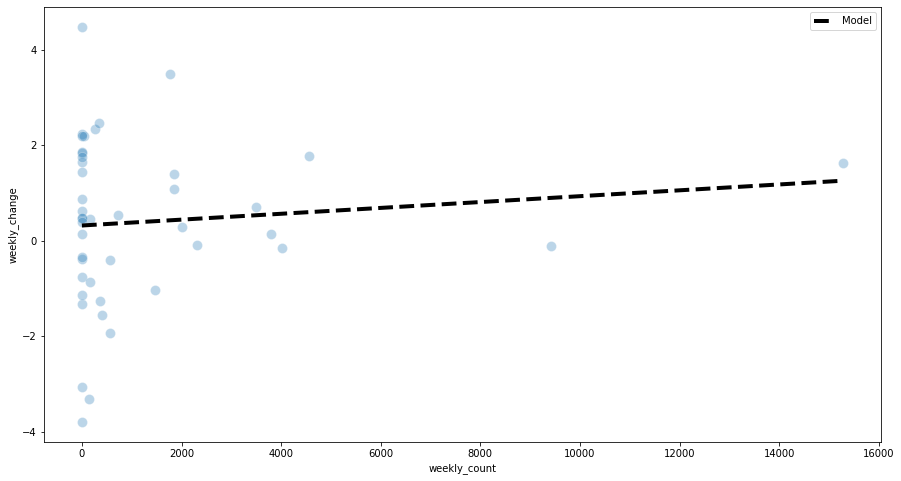

In [21]:
## We want to visualize our model to have a better sense about it 
## Plot the orginal data (as before)
sns.scatterplot(x='weekly_count', y='weekly_change', alpha=0.3, data=weekly_data, s=100)

## Generate and plot the model fit line
xs = np.arange(weekly_data['weekly_count'].min(), weekly_data['weekly_count'].max())
ys = 6.142e-05 * xs + 0.3198 
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('weekly_count')
plt.ylabel('weekly_change')
plt.legend();

We can see that the p-value we get in this case is 0.516 > 0.05. This indicates that there might not exists a correlation between the number of tweets and bitcoin price change. Also, R-squared is 0.010 is very small, which indicates that the linear correlation is very weak. From the visualization of the linear regression, we can see that there is not obvious relation, and the line is highly influenced by the outlier. Thus, we failed to reject our null hypothesis. 

We move on to see if there is a correlation between the number of favourites gained by these tweets and the buying volume on the weekly basis. We analysis the data through a similar process.

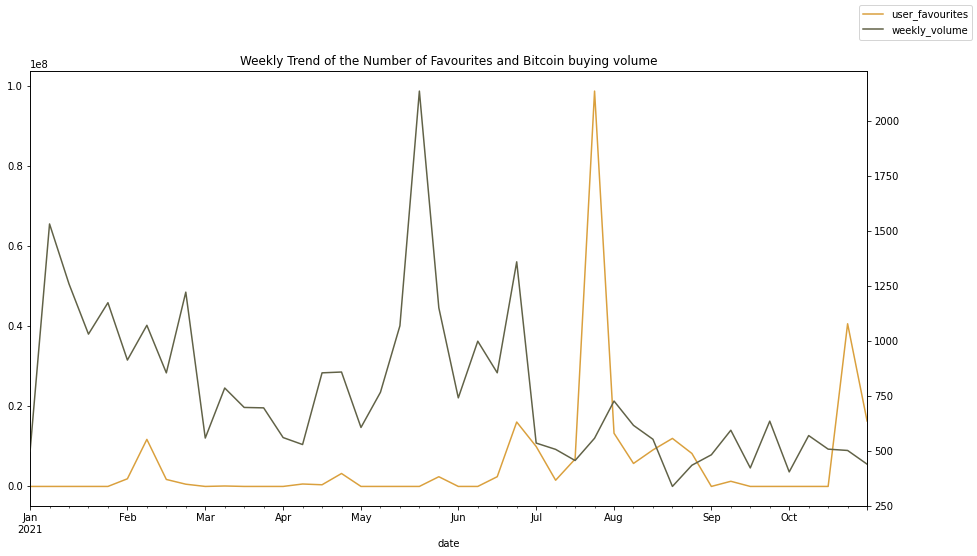

In [22]:
## number of favourites vs. bitcoin buying volume weekly
ax1 = weekly_data.plot(x = 'date', y = 'user_favourites', legend = False, color = '#DAA03DFF')
ax11 = ax1.twinx()
weekly_data.plot(x = 'date', y = 'weekly_volume', ax = ax11, legend = False, color = '#616247FF')
ax11.figure.legend()
plt.title('Weekly Trend of the Number of Favourites and Bitcoin buying volume')
plt.show()


The graph comparing the number of total user favorites related to tweets mentioning Elon musk and bitcoin buying volume appears to indicate an inverse relationship. The more the user favorites the less the buying volume, and this is likely due to outliers. Here, we create a model using weekly count of user favourites gained by the tweets that mentioned Elon Musk to predict the weekly change of bicoin buying volume.

In [23]:
## generate a model 
outcome, predictors = patsy.dmatrices('weekly_volume ~ user_favourites', weekly_data)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          weekly_volume   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.122
Date:                Tue, 07 Dec 2021   Prob (F-statistic):              0.296
Time:                        20:15:20   Log-Likelihood:                -319.89
No. Observations:                  44   AIC:                             643.8
Df Residuals:                      42   BIC:                             647.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         794.3726     57.356     

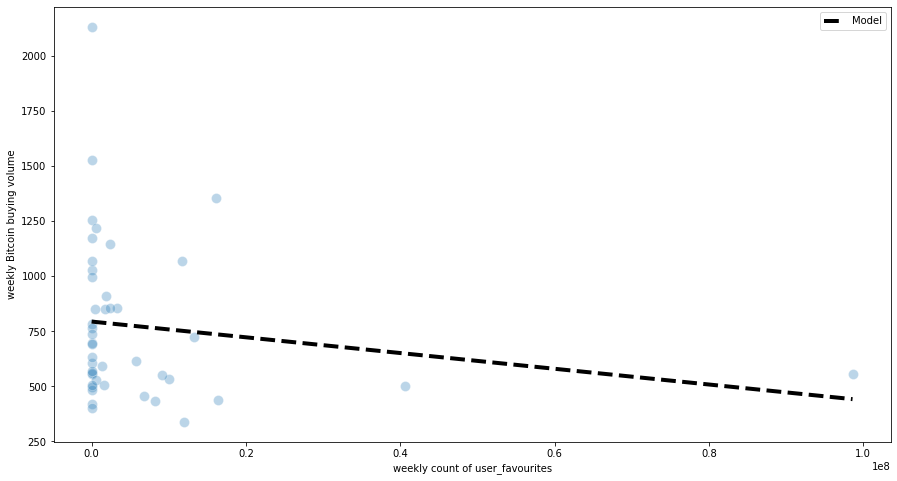

In [50]:
# Plot the orginal data (as before)
sns.scatterplot(x='user_favourites', y='weekly_volume', alpha=0.3, data=weekly_data, s=100)

# Generate and plot the model fit line
xs = np.arange(weekly_data['user_favourites'].min(), weekly_data['user_favourites'].max())
ys = -3.574e-06 * xs + 794.3726 
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('weekly count of user_favourites')
plt.ylabel('weekly Bitcoin buying volume')
plt.legend();

To confirm the previous graph of a potential inverse relationship we ran a linear regression test to observe the results. Similarly, like the regression test performed on the count of elon musk posts and change in Bitcoin value, we did not find a correlation between the number of user favourites and the buying volume of Bitcoin on a weekly basis because the p-value is strictly greater than 0.05. R-squared is still very small with a value of 0.026. We also visualize the linear regression, and the result shows clearly that there is no relation at all.

Unfortunately, weekly data does not show that there is a correlation between the variables we chose. Let's then look at the daily trend of bitcoin price change the number of tweets mentioning Elon Musk.

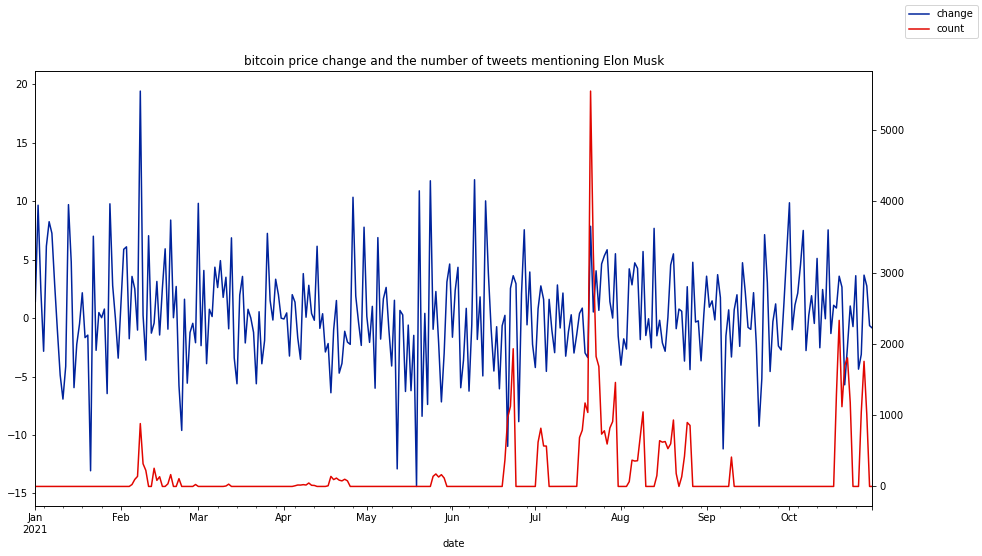

In [37]:
## count vs. bitcoin price change% daily
ax = data.plot(x='date', y='change', legend=False, color = '#00239CFF')
ax2 = ax.twinx()
data.plot(x='date', y='count', ax=ax2, legend=False, color="#E10600FF")
plt.title('bitcoin price change and the number of tweets mentioning Elon Musk')
ax.figure.legend()
plt.show()

The graph of bitcoin price change and number of tweets mentioning Elon Musk reveals no correlation as there is inconsistency across the plot. Let's use linear regression to find the relation between bitcoin price change and the number of tweets mentioning Elon Musk

In [39]:
## generate a model 
outcome, predictors = patsy.dmatrices('change ~ count', data)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 change   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.800
Date:                Tue, 07 Dec 2021   Prob (F-statistic):             0.0522
Time:                        20:28:41   Log-Likelihood:                -879.93
No. Observations:                 304   AIC:                             1764.
Df Residuals:                     302   BIC:                             1771.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1719      0.267      0.645      0.5

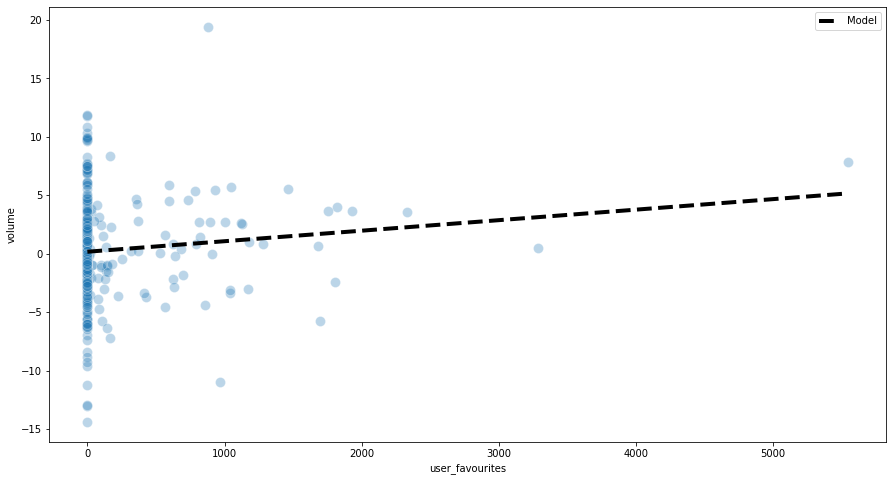

In [40]:
# Plot the orginal data (as before)
sns.scatterplot(x='count', y='change', alpha=0.3, data=data, s=100)

# Generate and plot the model fit line
xs = np.arange(data['count'].min(), data['count'].max())
ys = 0.0009 * xs + 0.1719 
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('user_favourites')
plt.ylabel('volume')
plt.legend();

From the report, the p-value is 0.052 and R-squared is 0.012. Both p-value and R-squared suggest that there is no relationship between the variables we chose, and we should retain the null hypothesis. The visulization of the model shows the data points are slightly aligned to the line, but the line is also highly affected by the outliers.We did not find a correlation between the count of tweets that mentioned Elon Musk and the Bitcoin change on a daily basis. What about user favourites and buying volume on a daily basis?

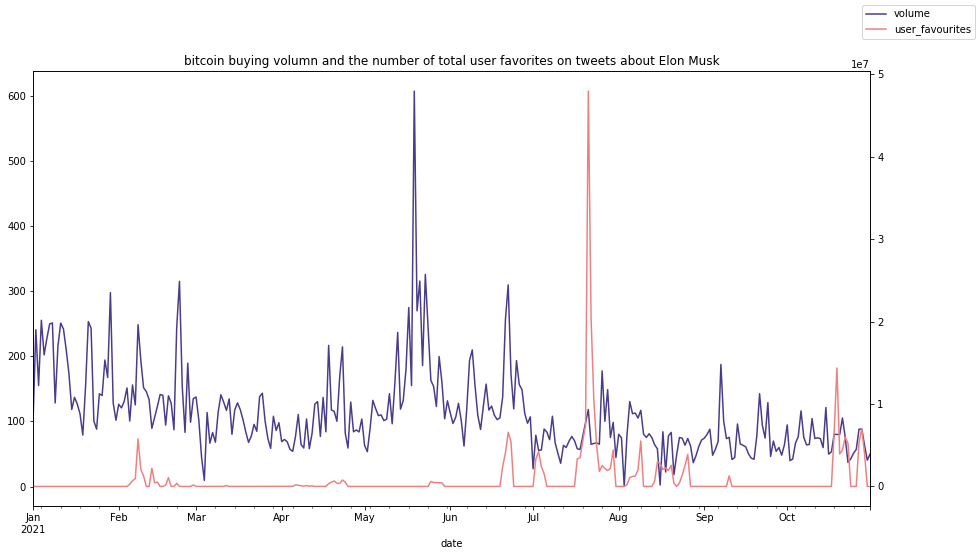

In [41]:
## user favourites vs. volume change% daily
ax = data.plot(x='date', y='volume', legend=False, color = 'darkslateblue')
ax2 = ax.twinx()
data.plot(x='date', y='user_favourites', ax=ax2, legend=False, color="lightcoral")
plt.title('bitcoin buying volumn and the number of total user favorites on tweets about Elon Musk')
ax.figure.legend()
plt.show()

In [42]:
## generate a model
outcome, predictors = patsy.dmatrices('volume ~ user_favourites', data)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 volume   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3119
Date:                Tue, 07 Dec 2021   Prob (F-statistic):              0.577
Time:                        20:29:30   Log-Likelihood:                -1701.0
No. Observations:                 304   AIC:                             3406.
Df Residuals:                     302   BIC:                             3413.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         112.4008      3.869     

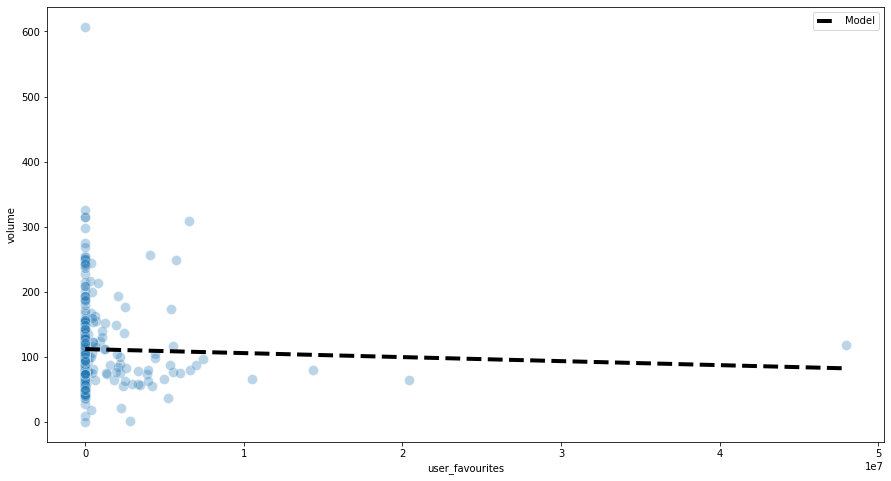

In [49]:
# Plot the orginal data (as before)
sns.scatterplot(x='user_favourites', y='volume', alpha=0.3, data=data, s=100)
# Generate and plot the model fit line
xs = np.arange(data['user_favourites'].min(), data['user_favourites'].max())
ys = -6.17e-07 * xs + 112.4008 
plt.plot(xs, ys, '--k', linewidth=4, label='Model')

plt.xlabel('user_favourites')
plt.ylabel('volume')
plt.legend();

Unfortunately, both the OLS Regression model and the visualization of the model indicate that there does not exist a relationship between the daily user favourites count and daily buying volumn. Still, we failed to find a positive correaltion between the user favourites gained by tweets that mentioned Elon Musk and the buying volume of Bitcoin on that particular day. 

From the above graphs and OLS Regression Results, we found out more tweets that mentioned Elon Musk likely do not increase the bitcoin value of that particular day. We also found out that the total of user favorites on tweets about Elon Musk of the day does not impact the buying volumes of that day. Also, on a weekly basis, the above correlations also don't hold true according to linear models. For futhure research, we want to look at the tweets from Elon Musk directly and their impacts on the Bitcoin price change and buying volumes.

# Ethics & Privacy

The data being analyzed by our group contains information related to the user's description and location, but when preprocessing the data, we discarded user's name, location and description which are all the columns that could potentially violate user's privacy. As a result, we did not use any user's personal information in our analysis process. Because of its publicity on the internet, there would be no privacy violation as the datasets online are being accessed and downloaded in open-source for the intended purpose of data analysis. Potential issues could be that users and organizations on Twitter could be unaware that their information and tweets content are being collected for data analysis through Twitter's API. Another issue regarding these data involves the primary use of English as opposed to other languages, which increases the likelihood of bias towards English speakers comparatively to other languages. Hence, the results of this project will not be representative or accurate globally.

# Conclusion & Discussion

In this project, we tried to explore potential relationships between tweets that mention Elon Musk and the Bitcoin value changes, and between user favourites gained by those tweets and the Bitcoin buying volume from 2021/1/1 to 2021/10/31. We hypothesized that more tweets that mentioned Elon Musk would increase the Bitcoin value change on both daily and weekly basis, and more user favourites gained by the tweets that mentioned Elon Musk would increase the Bitcoin buying volume on both daily and weekly basis. 

Two online datasets were recruited for the subsequent analysis. The first dataset contains all bitcoin tweets with #Bitcoin and #btc hashtag. The second dataset contains the Bitcoin value change of the year 2021. We combined the two datasets based on dates and filter out necessary data for the analysis, and generated OLS models for the variables that we are interested in. We first fitted an OLS model using the number of weekly tweets that mentioned Elon Musk to predict the weekly Bitcoin value change, and we gained an R-squared value of 0.010 and a p-value of 0.516, which is greater than 0.05. Another OLS model was fitted using the weekly count of user favourites gained by the tweets to predict the weekly buying volume of Bitcoin, resulting in an R-squared value of 0.026 and p-values of 0.296, which is also greater than 0.0005. We then trained the OLS model using the same variables, but examined them on a daily basis, getting R-squared value and p-value pairs of (0.012,0.052) for the number of tweets mentioned Elon Musk and the Bitcoin value, (0.001, 0.577) for the count of user favourites and the buying volume of Bitcoin. Overall, the reported R-squared values and p-values of all the above models do not support our hypothesis.

Based on the analyzations and graphs, from 2021/1/1 to 2021/10/31, more tweets that mentioned Elon Musk do not increase the Bitcoin value and buying volume. This result might be due to the amount of factors that actually contribute to bitcoin prices, and that reveals too much variance. A future improvement that may yield better results would be to look at tweets posted directly by Elon Musk, and perform the same analysis using this dataset.  However, The reason we didn’t do this directly is because there was no involvement of Elon Musk tweets and bitcoin within the 2021 dataset. We would have to manually use some twitter api to collect his tweets from 2020 (we couldn’t find any dataset having his tweets from that year and forward), and use that to analyze the prices of bitcoin of that same year. 

# Team Contributions

- **Jasmine Chen**: Overview, Data cleaning, EDA & Inferential Analysis, Ethics & Privacy, create video slides.
- **Jingwen Liu**: Hypothesis, Data cleaning, EDA & Inferential Analysis, Ethics & Privacy, create video slides.
- **Hoang Nguyen**: Overview, Data cleaning, EDA & Inferential Analysis, Ethics & Privacy, Conclusion & Discussion, create video slides, video presentaion.
- **Ruoxuan Li**: Overview, Background, Hypothesis, Data cleaning, EDA & Inferential Analysis, Conclusion & Discussion, create video slides.